### Classification using Mobile Phones dataset

In [1]:
#Load Dataset
import pandas as pd
mobile_data = pd.read_csv('mobile.csv',header='infer')
mobile_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [2]:
# Remove missing values
mobile_data = mobile_data.dropna()

In [3]:
# Split the data into training and test sets
import numpy as np 
from sklearn.model_selection import train_test_split 
X = mobile_data.drop('price_range', axis=1)
Y = mobile_data['price_range']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
# Count train and test sets 
  
print('X_train :%s\n X_test :%s\n Y_train :%s\n Y_test :%s\n' % (X_train.shape, X_test.shape, Y_train.shape ,Y_test.shape)) 


X_train :(1400, 20)
 X_test :(600, 20)
 Y_train :(1400,)
 Y_test :(600,)



#### a. Generating a decision tree classifier that uses gini index as the impurity measure with a maximum depth of 3.

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train, Y_train)

##### i. Plot the resulting decision tree obtained after training the classifier.

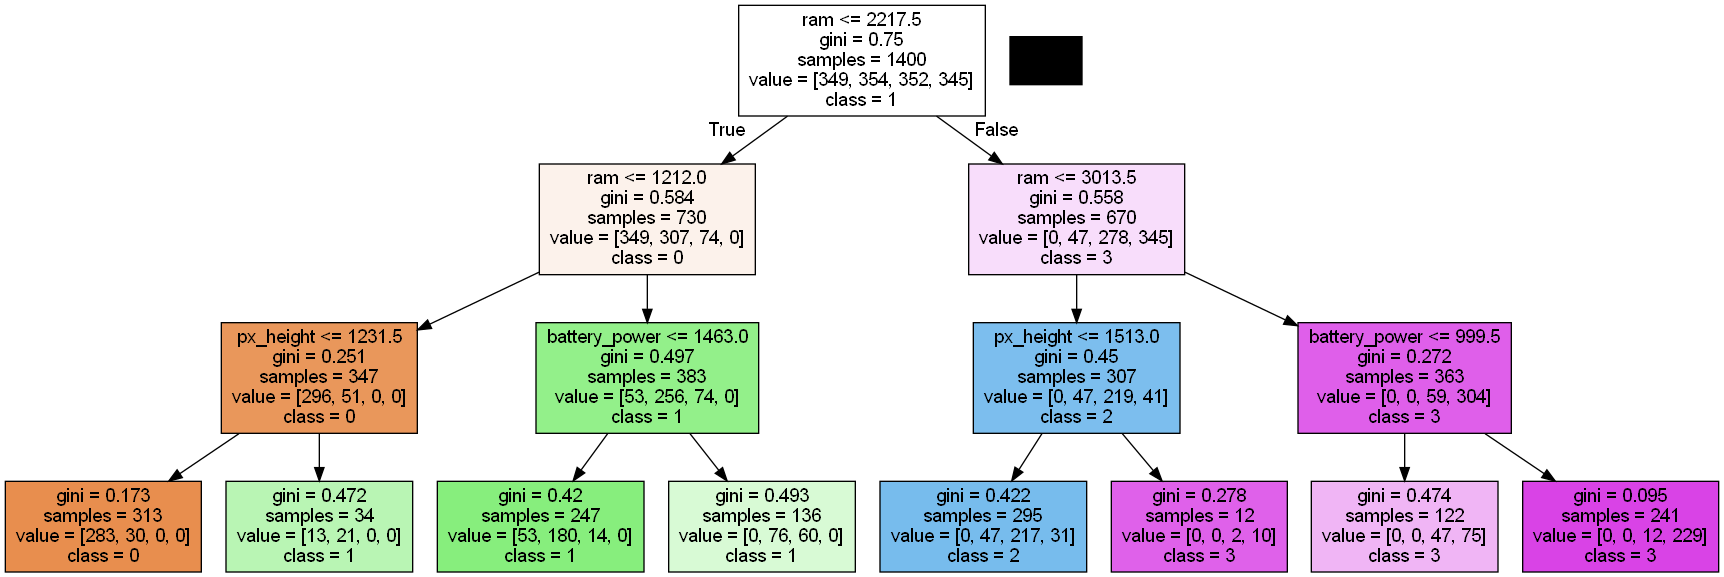

In [6]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X_train.columns, class_names=['0','1', '2', '3'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

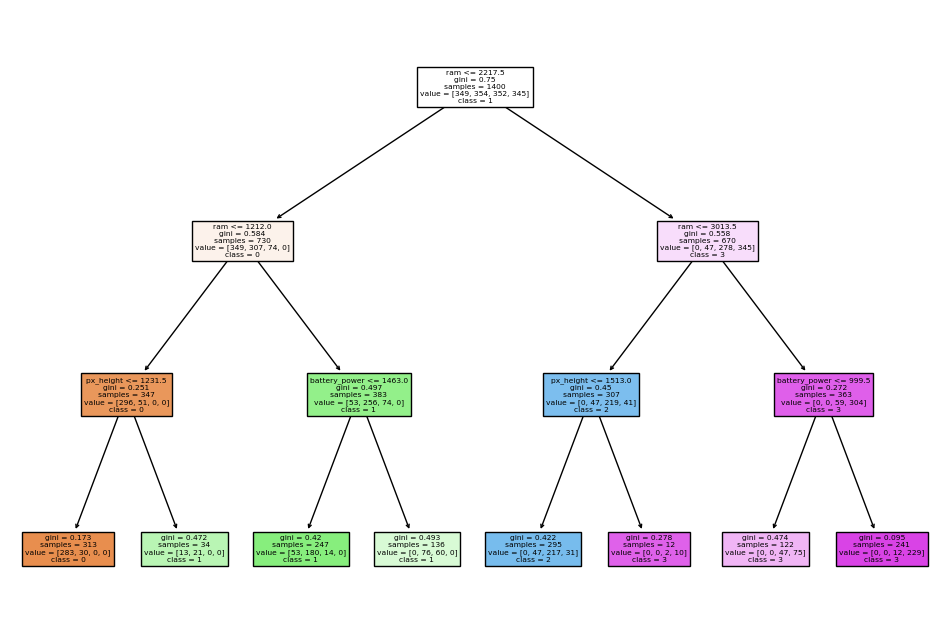

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0','1','2','3'])
plt.show()

##### ii. Compute the accuracy on the test set.

In [8]:
from sklearn.metrics import accuracy_score
Y_pred_data = clf.predict(X_test)
predictions = pd.Series(Y_pred_data,name='Predicted Class')
predictions

0      0
1      2
2      1
3      3
4      1
      ..
595    3
596    0
597    0
598    1
599    0
Name: Predicted Class, Length: 600, dtype: int64

In [9]:
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, Y_pred_data)))

Accuracy on test data is 0.75


##### iii. Plot the accuracy for different depth values (try values between 2 and 20) for both training and test

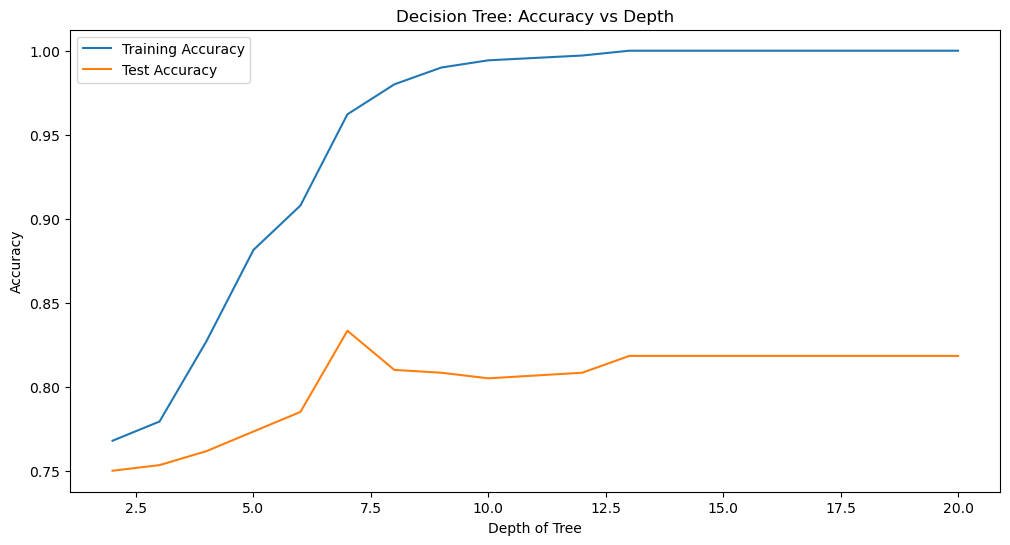

In [10]:
train_accuracies_dt = []
test_accuracies_dt = []
depths = range(2, 21)
for depth in depths:
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(X_train, Y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    train_accuracies_dt.append(accuracy_score(Y_train, train_pred))
    test_accuracies_dt.append(accuracy_score(Y_test, test_pred))

plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies_dt, label='Training Accuracy')
plt.plot(depths, test_accuracies_dt, label='Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Depth')
plt.legend()
plt.show()

###### Yes we observe, the accuracy increases as we increase the depth in the training dataset, this will contribute to overfitting

#### b. Generate a k-nn classifier for different number of nearest neighbors, k (hyperparameter). Consider k values between 2 and 15. Plot the accuracies.

Text(0, 0.5, 'Accuracy')

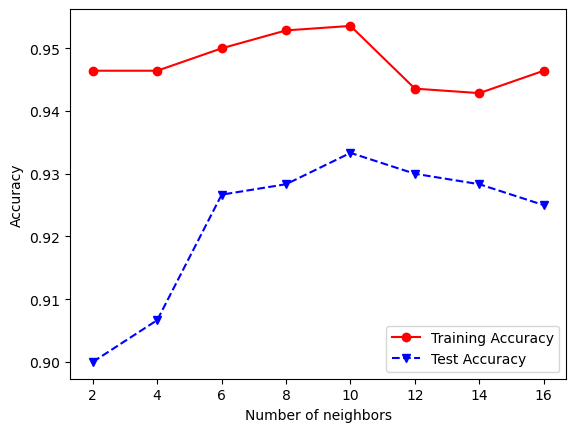

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [2,4,6,8,10,12,14,16]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf_knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knn.fit(X_train, Y_train)
    Y_predTrain = clf_knn.predict(X_train)
    Y_predTest = clf_knn.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

#### c. Generate a support vector machine with a linear kernel where hyperparameter C can get values [0.001, 0.01, 0.1, 1]. Plot the accuracies for different C values.

Text(0, 0.5, 'Accuracy')

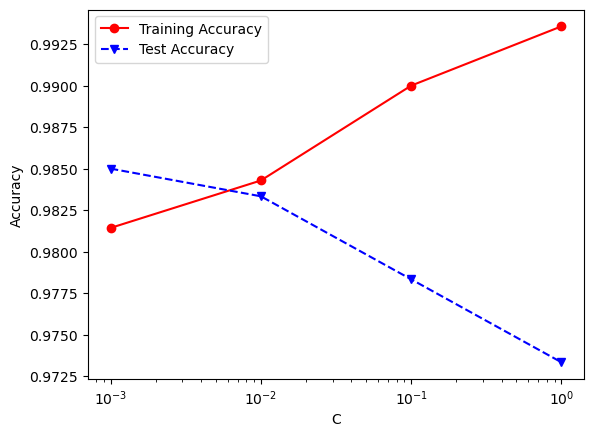

In [12]:
from sklearn import linear_model
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf_svc = SVC(C=param,kernel='linear')
    clf_svc.fit(X_train, Y_train)
    Y_predTrain = clf_svc.predict(X_train)
    Y_predTest = clf_svc.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

#### d. Generate ensemble classifiers, bagging, boosting, and adaboost, with 150 base-classifiers with a maximum depth of 5. Plot the accuracies for both training and test. Which one performs better than the others?

[Text(1.5, 0, 'Bagging'),
 Text(2.5, 0, 'GradBoosting'),
 Text(3.5, 0, 'AdaBoost'),
 Text(4.5, 0, 'Random Forest')]

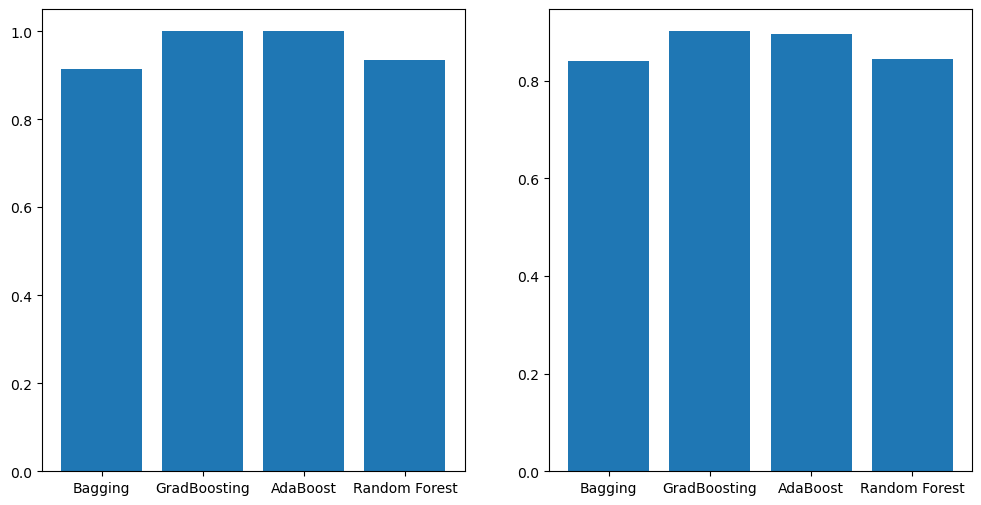

In [16]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 150
maxdepth = 5
trainAcc = []
testAcc = []

# Bagging
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

# Gradient Boosting
clf = ensemble.GradientBoostingClassifier(n_estimators=numBaseClassifiers,max_depth=maxdepth)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

# AdaBoost
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

# Random Forest
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers,max_depth=maxdepth)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Bagging', 'GradBoosting', 'AdaBoost', 'Random Forest']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5,4.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5,4.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5,4.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5,4.5])
ax2.set_xticklabels(methods)

### K-means clustering using longitude, latitude, and median income columns

In [17]:
Housing_data = pd.read_csv('data1.csv',header='infer')
Housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
Cluster_data = Housing_data[['longitude','latitude','median_income']]
Cluster_data

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


#####  a. Pick k = 5  and form 5 clusters by assigning each instance to its nearest centroid.

In [37]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(Cluster_data) 
labels = k_means.labels_

In [53]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=Cluster_data.columns)

,longitude,latitude,median_income
0,-118.024414,33.867337,5.192755
1,-121.930650,37.692503,5.428276
2,-121.598676,38.118591,2.744320
3,-117.991899,33.992940,2.706499
4,-119.095068,34.770565,10.349788


In [40]:
pd.DataFrame(labels, index=Cluster_data.index, columns=['Cluster ID'])

,Cluster ID
0,1
1,1
2,1
3,1
4,2
...,...
20635,2
20636,2
20637,2
20638,2


Text(0, 0.5, 'SSE')

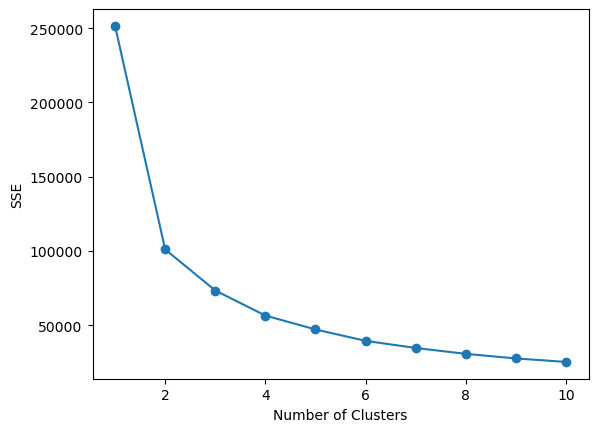

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
numClusters = [1,2,3,4,5,6,7,8,9,10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(Cluster_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Hierarchical Clustering: First 50 row in the Customer Segmentation Dataset - apply three hierarchical clustering algorithms

In [28]:
Customer_data = pd.read_csv('data2.csv',header='infer', nrows = 50 )
Customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


##### (1) single link (MIN)

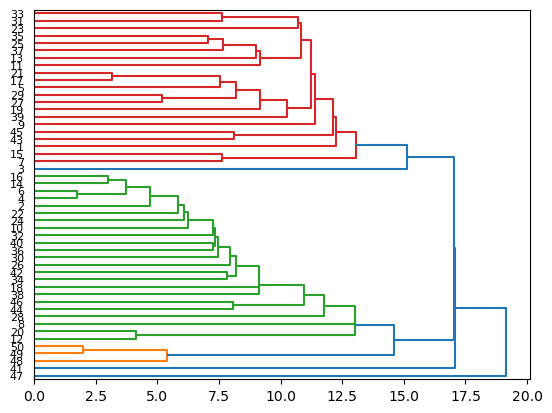

In [31]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = Customer_data['CustomerID']
Y = Customer_data['cluster']
X = Customer_data.drop(['CustomerID','cluster'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

##### (2) Complete Link (MAX)

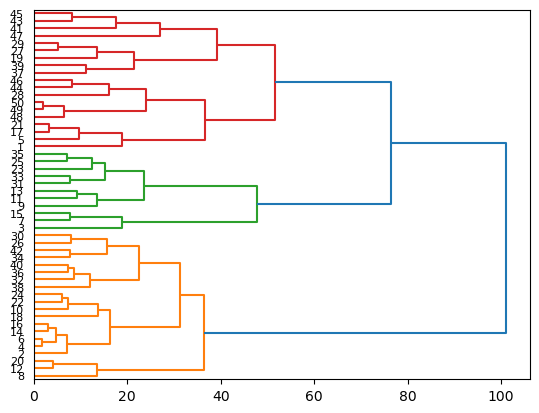

In [33]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

##### (3) Group Average

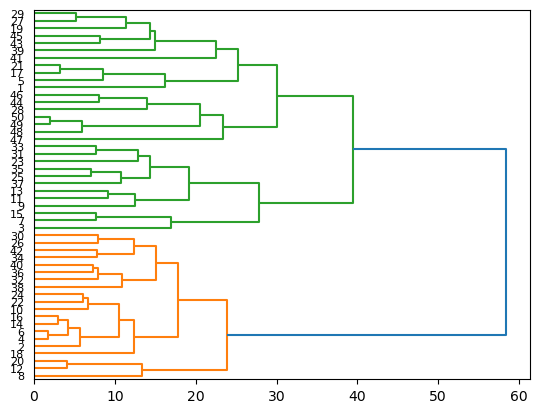

In [34]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Density Based Clustering

##### DBSCAN algorithm. Consider annual income as the x axis and spending score as the y axis and plot the clusters.

In [36]:
Customers_data = pd.read_csv('data2.csv',header='infer')
Customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

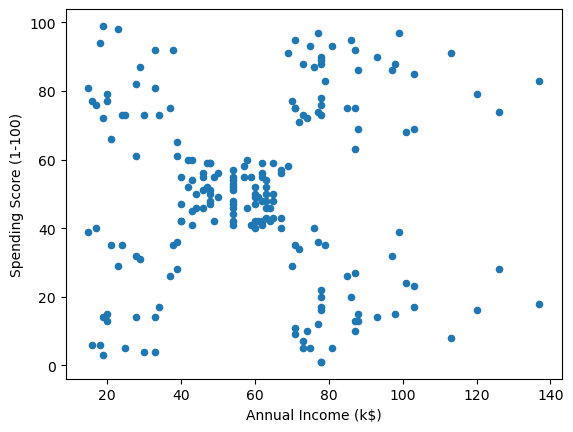

In [43]:
Customers_data.plot.scatter(x='Annual Income (k$)',y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

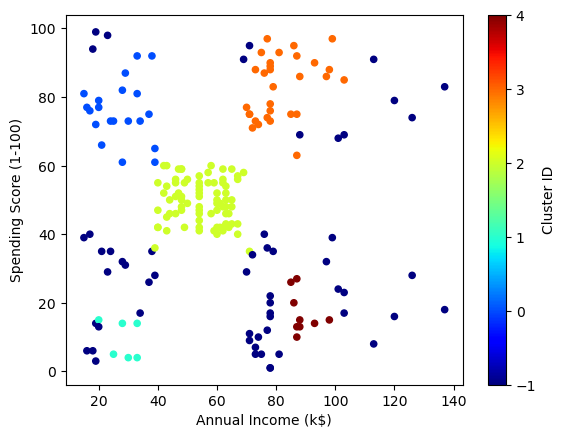

In [51]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15, min_samples=6).fit(Customers_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((Customers_data,labels), axis=1)
result.plot.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',c='Cluster ID', colormap='jet')